# Простейшая нейронная сеть

## Установка библиотек С ПОМОЩЬЮ pip
Убеждаемся что в системе установлена библиотека `tensorflow`

`%%capture` - магическая команда, скрывающая вывод

In [16]:
%%capture
%pip install tensorflow

## Подключение библиотек

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Подключение Keras
Импортируем из `Keras` "полносвязный слой" `Dense`

In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Dense # type: ignore

## Модель нейронной сети

Создаём пустую последовательную модель нейронной сети

In [19]:
model = keras.Sequential()

Модель должна реализовывать функцию преобразования градусов Цельсия в градусы Фаренгейта по формуле 

$$
F = 1.8 \cdot C + 32
$$

Добавление в модель одного полносвязного слоя нейроннов

- `units=1` - в слое будет 1 нейрон
- `input_shape=(1,)` - в слое будет один вход
- Функция активации - линейная

In [20]:
model.add(Dense(units=1, input_shape=(1,), activation='linear'))

# Компиляция модели с указанием метода обучения

- Метод обучения `Adam` - модифицированный метод обратного распространения с инерцией
- Скорость обучения 0.1
- Функция потерь - среднеквадратичная ошибка

In [21]:
learning_rate = 0.1
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate))

## Обучение

Формируем обучающую выборку

In [22]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

Выполняем обучение сети

In [23]:
epochs_count = 500
log = model.fit(c, f, epochs=epochs_count, verbose=False)

Просмотр результатов обучения

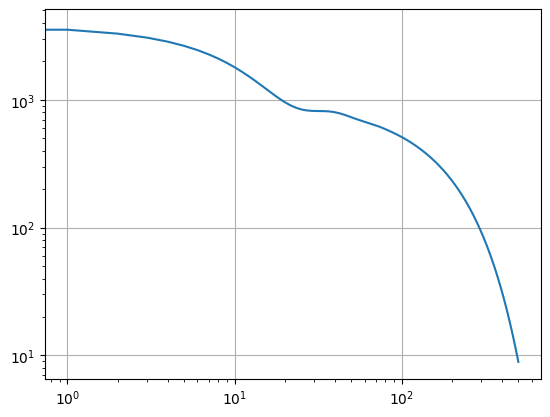

In [24]:
plt.plot(log.history['loss'])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

## Использование сети

In [25]:
print(model.predict(np.array([100])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[211.31424]]


Просмотр структуры сети

In [26]:
w, o = model.get_weights()
print(w, o)

[[1.8237685]] [28.93739]
